## Tensorboard

In [4]:
# importing libaries

import tensorflow as tf
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# ignore warnings

import warnings
warnings.filterwarnings('ignore')

# igonre warnings in output
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)





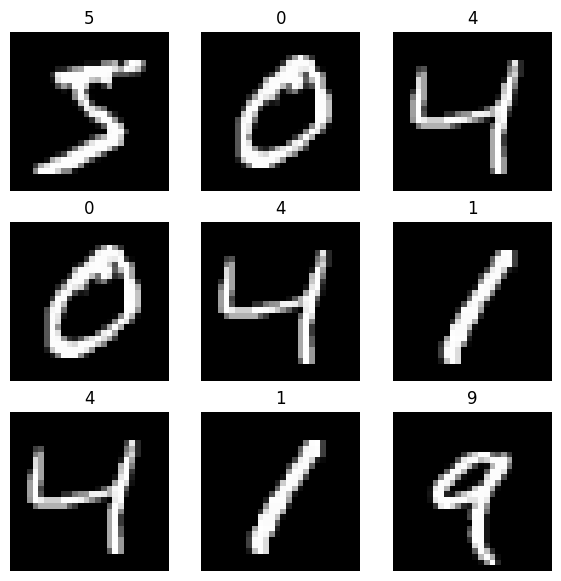

In [7]:
# loading MNIST data

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalizing data betwwen 0 and 1

x_train, x_test = x_train / 255.0, x_test / 255.0

# plotting fitst 9 images

import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(7, 7))

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(x_train[i+j], cmap='gray')
        ax[i, j].set_title(y_train[i+j])
        ax[i, j].axis('off')

plt.show()

In [8]:
# creating model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# compiling model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# training the model

history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# evaluate the model

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')





Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8952 - loss: 0.3348 - val_accuracy: 0.9831 - val_loss: 0.0511
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9839 - loss: 0.0541 - val_accuracy: 0.9874 - val_loss: 0.0394
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9880 - loss: 0.0384 - val_accuracy: 0.9891 - val_loss: 0.0315
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9910 - loss: 0.0289 - val_accuracy: 0.9907 - val_loss: 0.0270
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9933 - loss: 0.0222 - val_accuracy: 0.9891 - val_loss: 0.0344
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accuracy: 0.9925 - val_loss: 0.0268
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9955 - loss: 0.0128 - val_accuracy: 0.9898 - val_loss: 0.0312
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9961 -

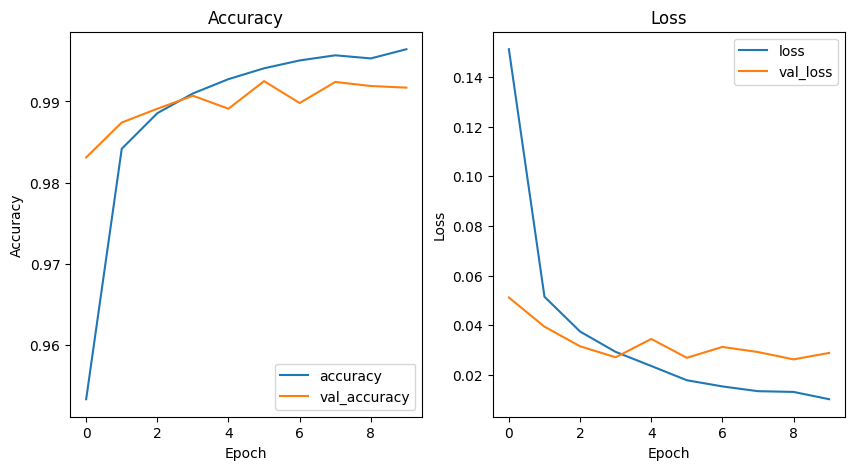

In [9]:
# plotting the accuracy and loss

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

In [ ]:
# lets do it in tensorboard


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# compiling model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# creating callback for tensorboard

tensorboard_callback = TensorBoard(log_dir='logs',histogram_freq=1)

history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test),callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9969 - loss: 0.0087 - val_accuracy: 0.9919 - val_loss: 0.0320
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9973 - loss: 0.0083 - val_accuracy: 0.9913 - val_loss: 0.0351
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9981 - loss: 0.0059 - val_accuracy: 0.9913 - val_loss: 0.0371
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9981 - loss: 0.0059 - val_accuracy: 0.9917 - val_loss: 0.0355
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9983 - loss: 0.0062 - val_accuracy: 0.9917 - val_loss: 0.0377
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9975 - loss: 0.0068 - val_accuracy: 0.9917 - val_loss: 0.0392
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9986 - loss: 0.0041 - val_accuracy: 0.9916 - val_loss: 0.0391
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9977 -

In [14]:
# activating tensorboard

%load_ext tensorboard


%tensorboard --logdir logs



Launching TensorBoard...